In [1]:
#importing NetworkX and important libraries for analysis
!pip install networkx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Function to read data from file
def get_data(filename):
  with open(filename, 'r', encoding='utf8') as f:
    lines = f.read().split("\n")
    data = [line.split("\t") for line in lines]
    data = data[1:]
  return data

In [3]:
#Actually getting the data
data_men = get_data('MenEdges.csv')
data_women = get_data('WomenEdges.csv')

In [4]:
print(data_men)

[['Frane Kojic,Fan Zhendong'], ['Yevhen Pryshchepa,Joao Monteiro'], ['Ewout Oostwouder,Nima Alamian'], ['Florent Lambiet,Quadri Aruna'], ['Qiu Dang,Lin Yun-ju'], ['Hunor Szocs,Panagiotis Gionis'], ['Vadim Yarashenka,Kou Lei'], ['Supanut Wisutmaythangkoon,Liang Jingkun'], ['Joao Monteiro,Fan Zhendong'], ['Nima Alamian,Quadri Aruna'], ['Lin Yun-ju,Panagiotis Gionis'], ['Kou Lei,Liang Jingkun'], ['Quadri Aruna,Fan Zhendong'], ['Panagiotis Gionis,Liang Jingkun'], ['Fan Zhendong,Liang Jingkun'], ['Michael Tauber,Dimitrij Ovtcharov'], ['Noshad Alamian,Deni Kozul'], ['Bastian Steger,Tomislav Pucar'], ['Zokhid Kenjaev,Sharath Kamal'], ['Gavin Rumgay,Kristian Karlsson'], ['Alexander Shibaev,Jakub Dyjas'], ['Alvaro Robles,Paul Drinkhall'], ['Marcelo Aguirre,Koki Niwa'], ['Deni Kozul,Dimitrij Ovtcharov'], ['Sharath Kamal,Tomislav Pucar'], ['Kristian Karlsson,Jakub Dyjas'], ['Paul Drinkhall,Koki Niwa'], ['Dimitrij Ovtcharov,Tomislav Pucar'], ['Jakub Dyjas,Koki Niwa'], ['Tomislav Pucar,Koki Niwa'],

In [6]:
# Flatten the list of lists and split the strings
edgesm = [edge.split(',') for sublist in data_men for edge in sublist if edge]
edgesw = [edge.split(',') for sublist in data_women for edge in sublist if edge]

print(edgesm)
print(edgesw)

[['Frane Kojic', 'Fan Zhendong'], ['Yevhen Pryshchepa', 'Joao Monteiro'], ['Ewout Oostwouder', 'Nima Alamian'], ['Florent Lambiet', 'Quadri Aruna'], ['Qiu Dang', 'Lin Yun-ju'], ['Hunor Szocs', 'Panagiotis Gionis'], ['Vadim Yarashenka', 'Kou Lei'], ['Supanut Wisutmaythangkoon', 'Liang Jingkun'], ['Joao Monteiro', 'Fan Zhendong'], ['Nima Alamian', 'Quadri Aruna'], ['Lin Yun-ju', 'Panagiotis Gionis'], ['Kou Lei', 'Liang Jingkun'], ['Quadri Aruna', 'Fan Zhendong'], ['Panagiotis Gionis', 'Liang Jingkun'], ['Fan Zhendong', 'Liang Jingkun'], ['Michael Tauber', 'Dimitrij Ovtcharov'], ['Noshad Alamian', 'Deni Kozul'], ['Bastian Steger', 'Tomislav Pucar'], ['Zokhid Kenjaev', 'Sharath Kamal'], ['Gavin Rumgay', 'Kristian Karlsson'], ['Alexander Shibaev', 'Jakub Dyjas'], ['Alvaro Robles', 'Paul Drinkhall'], ['Marcelo Aguirre', 'Koki Niwa'], ['Deni Kozul', 'Dimitrij Ovtcharov'], ['Sharath Kamal', 'Tomislav Pucar'], ['Kristian Karlsson', 'Jakub Dyjas'], ['Paul Drinkhall', 'Koki Niwa'], ['Dimitrij Ovt

In [7]:
# Create a directed graph (DiGraph)
Gm = nx.DiGraph()
Gw = nx.DiGraph()

In [8]:
# Add edges to the graph
Gm.add_edges_from(edgesm)
Gw.add_edges_from(edgesw)

In [9]:
# Print some basic information about the graph
print(Gm.nodes.data())
print(Gw.nodes.data())

[('Frane Kojic', {}), ('Fan Zhendong', {}), ('Yevhen Pryshchepa', {}), ('Joao Monteiro', {}), ('Ewout Oostwouder', {}), ('Nima Alamian', {}), ('Florent Lambiet', {}), ('Quadri Aruna', {}), ('Qiu Dang', {}), ('Lin Yun-ju', {}), ('Hunor Szocs', {}), ('Panagiotis Gionis', {}), ('Vadim Yarashenka', {}), ('Kou Lei', {}), ('Supanut Wisutmaythangkoon', {}), ('Liang Jingkun', {}), ('Michael Tauber', {}), ('Dimitrij Ovtcharov', {}), ('Noshad Alamian', {}), ('Deni Kozul', {}), ('Bastian Steger', {}), ('Tomislav Pucar', {}), ('Zokhid Kenjaev', {}), ('Sharath Kamal', {}), ('Gavin Rumgay', {}), ('Kristian Karlsson', {}), ('Alexander Shibaev', {}), ('Jakub Dyjas', {}), ('Alvaro Robles', {}), ('Paul Drinkhall', {}), ('Marcelo Aguirre', {}), ('Koki Niwa', {}), ('Horacio Cifuentes', {}), ('Hugo Calderano', {}), ('Tom Jarvis', {}), ('Kazuhiro Yoshimura', {}), ('Gustavo Tsuboi', {}), ('Cristian Pletea', {}), ('Robin Devos', {}), ('Sathiyan Gnanasekaran', {}), ('Hu Heming', {}), ('Vladimir Samsonov', {}),

In [10]:
# Print some basic information about the graph
print("Network Men")
print("Number of nodes:", Gm.number_of_nodes())
print("Number of edges:", Gm.number_of_edges())

# Print some basic information about the graph
print("\nNetwork Women")
print("Number of nodes:", Gw.number_of_nodes())
print("Number of edges:", Gw.number_of_edges())

Network Men
Number of nodes: 297
Number of edges: 916

Network Women
Number of nodes: 333
Number of edges: 926


##Visualization of Network using Gephi
###(Minimum degree is set to 5 for readability)

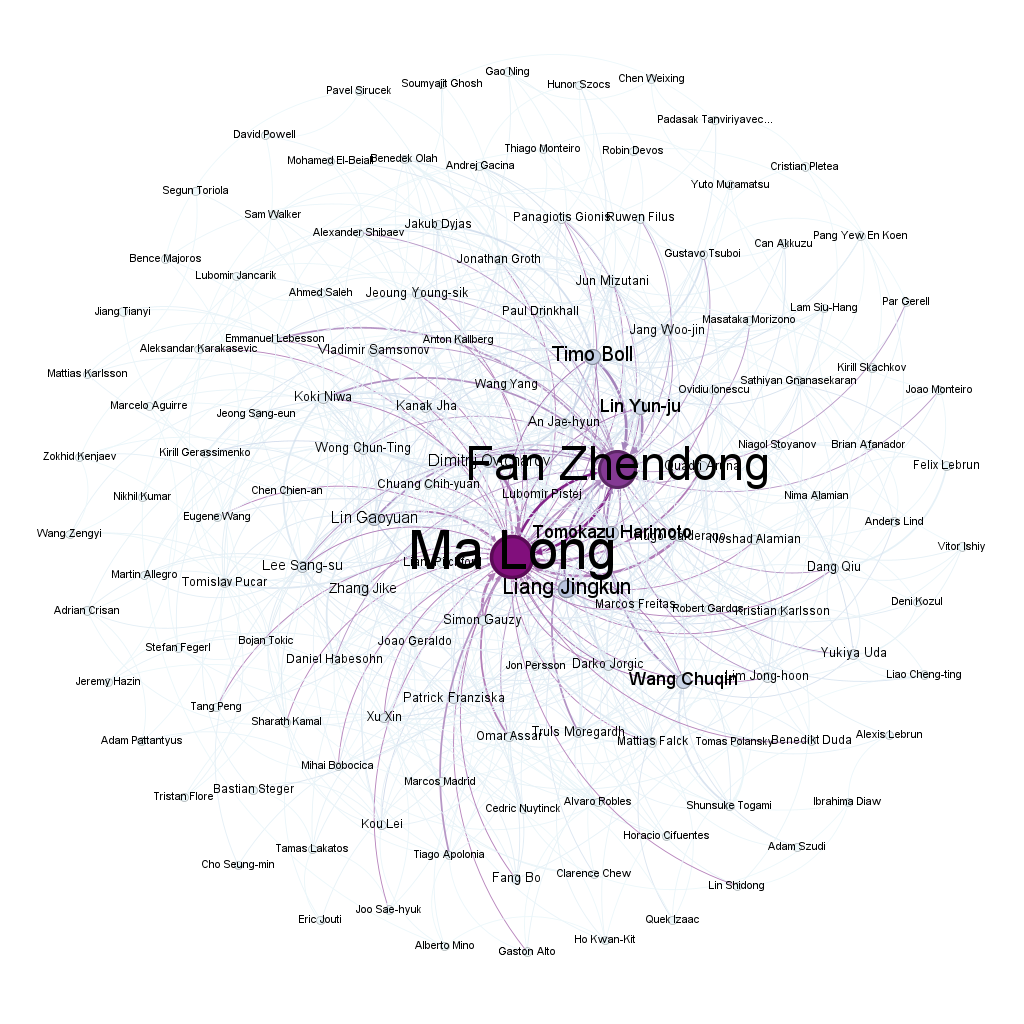

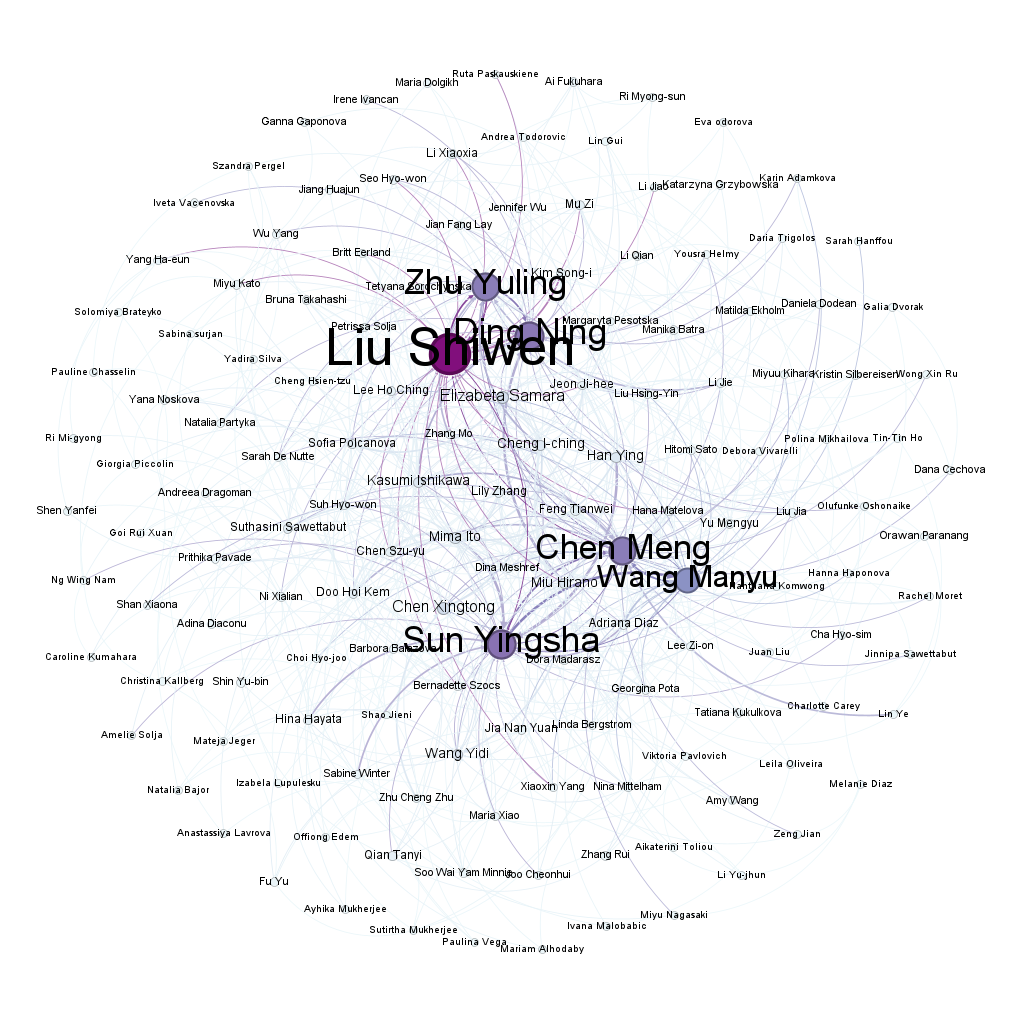

In [11]:
#for men
# Calculate the degree histogram
histm = nx.degree_histogram(Gm)

# Convert to numpy array for easier manipulation
histm_np = np.array(histm)

# Remove the zero degree entries (since they won't contribute to log scale)
histm_np = histm_np[1:]

# Get the degrees (x-axis)
degreesm = np.arange(1, len(histm_np) + 1)

#for women

# Calculate the degree histogram
histw = nx.degree_histogram(Gw)

# Convert to numpy array for easier manipulation
histw_np = np.array(histw)

# Remove the zero degree entries (since they won't contribute to log scale)
histw_np = histw_np[1:]

# Get the degrees (x-axis)
degreesw = np.arange(1, len(histw_np) + 1)


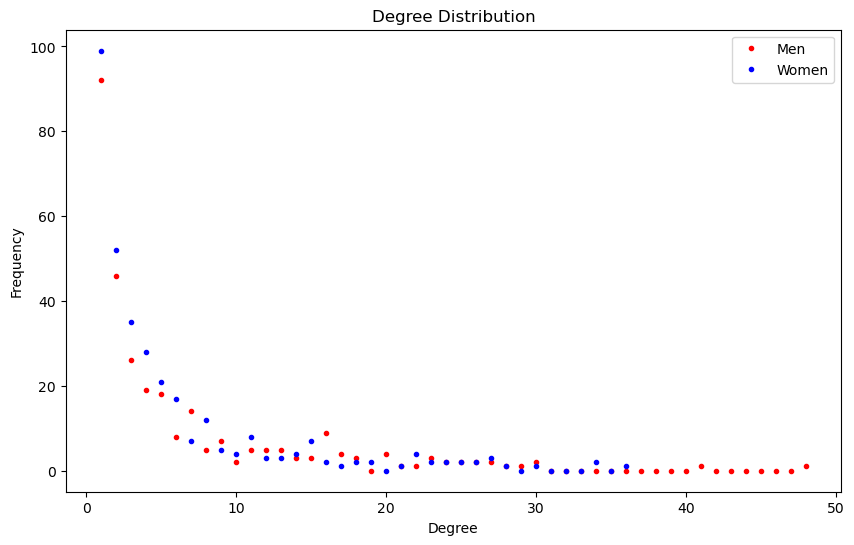

In [12]:
# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.plot(degreesm, histm_np, "r.", label= 'Men')
plt.plot(degreesw, histw_np, "b.", label= 'Women')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


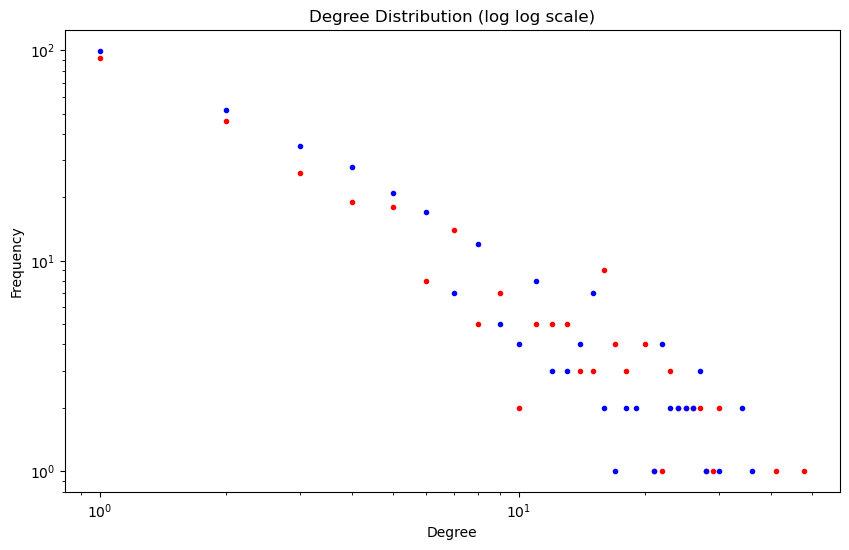

In [13]:
# Plot the degree distribution on a log-log scale
plt.figure(figsize=(10, 6))
plt.plot(degreesm, histm_np, "r.")
plt.plot(degreesw, histw_np, "b.")
plt.xscale('log')
plt.yscale('log')
plt.title('Degree Distribution (log log scale)')
plt.xlabel('Degree')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [14]:
# Calculate the clustering coefficient
clustering_coefficientm = nx.average_clustering(Gm)

# Print or use the clustering coefficient as needed
print("Clustering Coefficient:", clustering_coefficientm)

# Calculate the clustering coefficient
clustering_coefficientw = nx.average_clustering(Gw)

# Print or use the clustering coefficient as needed
print("Clustering Coefficient:", clustering_coefficientw)


Clustering Coefficient: 0.03377778459475192
Clustering Coefficient: 0.024498446079161264


C:\Users\Yusuf\AppData\Local\Temp\ipykernel_7028\1352828472.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrixm = nx.adjacency_matrix(Gm).toarray()


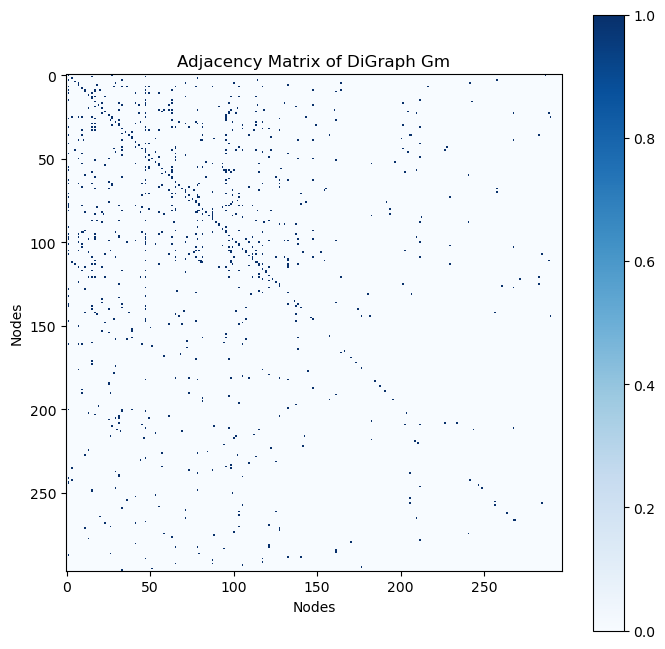

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_7028\1352828472.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrixw = nx.adjacency_matrix(Gw).toarray()


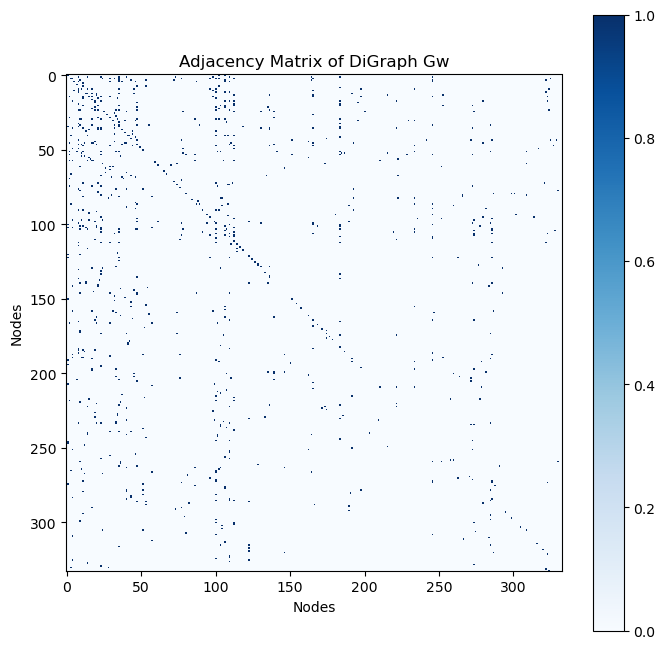

In [15]:
# Get the adjacency matrix
adjacency_matrixm = nx.adjacency_matrix(Gm).toarray()

# Plot the adjacency matrix
plt.figure(figsize=(8, 8))
plt.imshow(adjacency_matrixm, cmap='Blues', interpolation='none', aspect='equal')

# Customize plot (optional)
plt.title('Adjacency Matrix of DiGraph Gm')
plt.xlabel('Nodes')
plt.ylabel('Nodes')
plt.colorbar()

# Show the plot
plt.show()

#women
# Get the adjacency matrix
adjacency_matrixw = nx.adjacency_matrix(Gw).toarray()

# Plot the adjacency matrix
plt.figure(figsize=(8, 8))
plt.imshow(adjacency_matrixw, cmap='Blues', interpolation='none', aspect='equal')

# Customize plot (optional)
plt.title('Adjacency Matrix of DiGraph Gw')
plt.xlabel('Nodes')
plt.ylabel('Nodes')
plt.colorbar()

# Show the plot
plt.show()

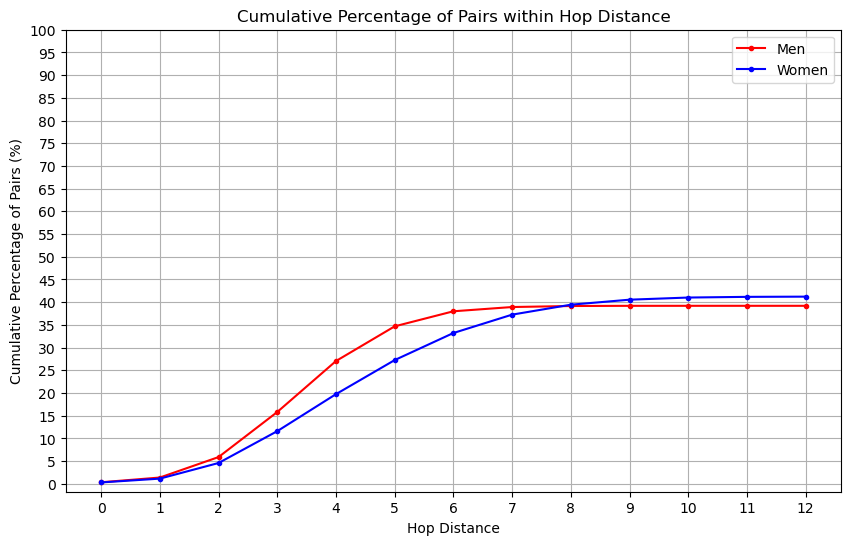

In [17]:
# Calculate the number of pairs within each hop distance
max_hop_distance = 12  # Adjust
pairs_within_distancem = [0] * (max_hop_distance + 1)

for node in Gm.nodes:
    paths = nx.single_source_shortest_path_length(Gm, node)
    for hop_distance in paths.values():
        if hop_distance <= max_hop_distance:
            pairs_within_distancem[hop_distance] += 1

# Calculate the cumulative percentage of pairs within each hop distance
total_pairsm = len(Gm.nodes) * (len(Gm.nodes) - 1)
cumulative_percentage_within_distancem = [sum(pairs_within_distancem[:i+1]) / total_pairsm * 100 for i in range(max_hop_distance + 1)]


#women
pairs_within_distancew = [0] * (max_hop_distance + 1)

for node in Gw.nodes:
    paths = nx.single_source_shortest_path_length(Gw, node)
    for hop_distance in paths.values():
        if hop_distance <= max_hop_distance:
            pairs_within_distancew[hop_distance] += 1

# Calculate the cumulative percentage of pairs within each hop distance
total_pairsw = len(Gw.nodes) * (len(Gw.nodes) - 1)
cumulative_percentage_within_distancew = [sum(pairs_within_distancew[:i+1]) / total_pairsw * 100 for i in range(max_hop_distance + 1)]

# Plot the results as points
plt.figure(figsize=(10, 6))
plt.plot(range(max_hop_distance + 1), cumulative_percentage_within_distancem, marker='.', linestyle='-', color='red', label= 'Men')
plt.plot(range(max_hop_distance + 1), cumulative_percentage_within_distancew, marker='.', linestyle='-', color='blue', label= 'Women')
plt.title('Cumulative Percentage of Pairs within Hop Distance')
plt.xlabel('Hop Distance')
plt.ylabel('Cumulative Percentage of Pairs (%)')
plt.xticks(range(max_hop_distance + 1))
plt.yticks(range(0, 101, 5))
plt.grid(True)
plt.legend()
plt.show()

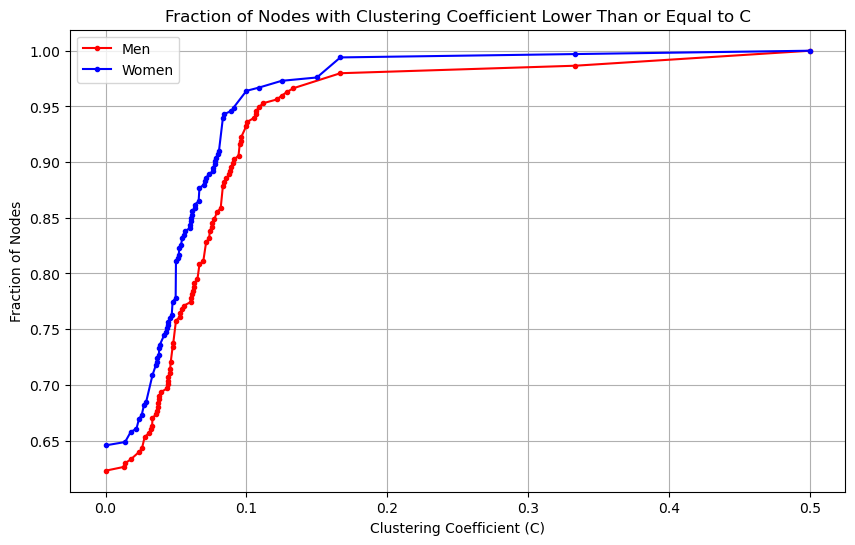

In [18]:
# Calculate the clustering coefficient for each node
clustering_coefficientsm = nx.clustering(Gm)

# Calculate the fraction of nodes with clustering coefficient lower than or equal to each value
unique_coeffsm, countsm = np.unique(list(clustering_coefficientsm.values()), return_counts=True)
cumulative_countsm = np.cumsum(countsm)
fraction_of_nodesm = cumulative_countsm / len(Gm.nodes)

# Calculate the clustering coefficient for each node
clustering_coefficientsw = nx.clustering(Gw)

# Calculate the fraction of nodes with clustering coefficient lower than or equal to each value
unique_coeffsw, countsw = np.unique(list(clustering_coefficientsw.values()), return_counts=True)
cumulative_countsw = np.cumsum(countsw)
fraction_of_nodesw = cumulative_countsw / len(Gw.nodes)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(unique_coeffsm, fraction_of_nodesm, marker='.', linestyle='-', color='red', label= 'Men')
plt.plot(unique_coeffsw, fraction_of_nodesw, marker='.', linestyle='-', color='blue', label= 'Women')
plt.title('Fraction of Nodes with Clustering Coefficient Lower Than or Equal to C')
plt.xlabel('Clustering Coefficient (C)')
plt.ylabel('Fraction of Nodes')
plt.grid(True)
plt.legend()
plt.show()


Power law : f(x) = b * x^(-a)

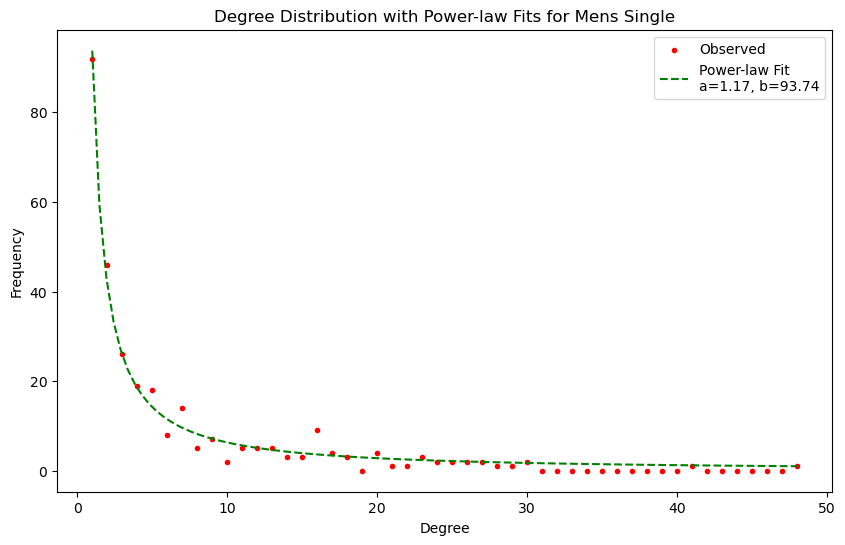

In [19]:
#men
from scipy.optimize import curve_fit

# Define the power-law function
def power_law_func(x, a, b):
    return b * x**(-a)

# Initial guesses for the power-law fit
a_power_law_init = 1.0
b_power_law_init = max(histm_np)

# Fit the degree distribution to the power-law function
popt_power_law, pcov_power_law = curve_fit(power_law_func, degreesm, histm_np, p0=(a_power_law_init, b_power_law_init))

# Extract the fitted parameters
a_power_law, b_power_law = popt_power_law

# Plot the fitted distributions
x_fit = np.linspace(min(degreesm), max(degreesm), 100)
y_fit_power_law = power_law_func(x_fit, a_power_law, b_power_law)

plt.figure(figsize=(10, 6))
plt.scatter(degreesm, histm_np, color='red', marker='.', label='Observed')
plt.plot(x_fit, y_fit_power_law, color='green', linestyle='--', label=f'Power-law Fit\na={a_power_law:.2f}, b={b_power_law:.2f}')
plt.title('Degree Distribution with Power-law Fits for Mens Single')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


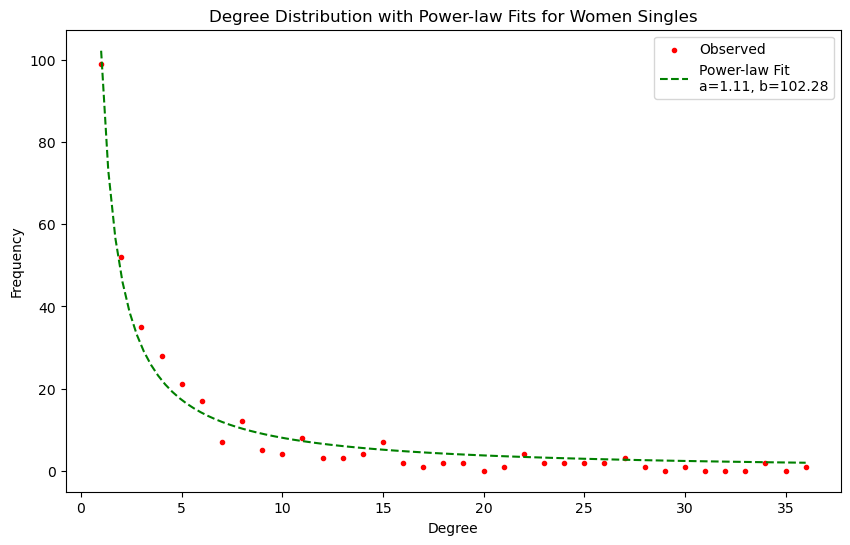

In [20]:
#women

# Define the power-law function
def power_law_func(x, a, b):
    return b * x**(-a)

# Initial guesses for the power-law fit
a_power_law_init = 1.0
b_power_law_init = max(histw_np)

# Fit the degree distribution to the power-law function
popt_power_law, pcov_power_law = curve_fit(power_law_func, degreesw, histw_np, p0=(a_power_law_init, b_power_law_init))

# Extract the fitted parameters
a_power_law, b_power_law = popt_power_law

# Plot the fitted distributions
x_fit = np.linspace(min(degreesw), max(degreesw), 100)
y_fit_power_law = power_law_func(x_fit, a_power_law, b_power_law)

plt.figure(figsize=(10, 6))
plt.scatter(degreesw, histw_np, color='red', marker='.', label='Observed')
plt.plot(x_fit, y_fit_power_law, color='green', linestyle='--', label=f'Power-law Fit\na={a_power_law:.2f}, b={b_power_law:.2f}')
plt.title('Degree Distribution with Power-law Fits for Women Singles')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

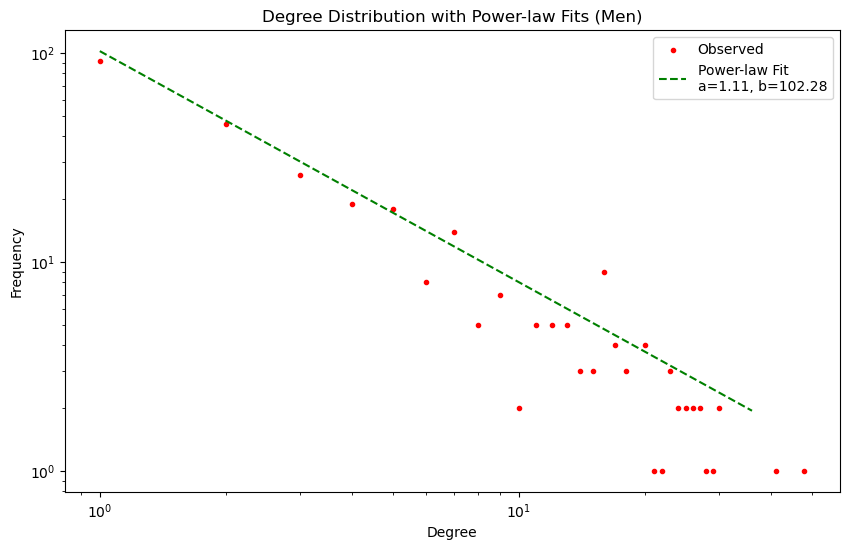

In [21]:
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.scatter(degreesm, histm_np, color='red', marker='.', label='Observed')
plt.plot(x_fit, y_fit_power_law, color='green', linestyle='--', label=f'Power-law Fit\na={a_power_law:.2f}, b={b_power_law:.2f}')
plt.title('Degree Distribution with Power-law Fits (Men)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

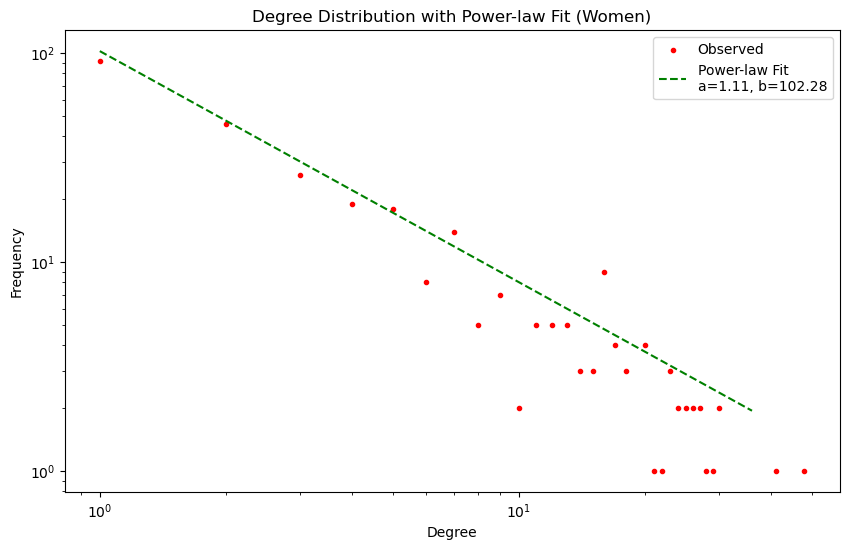

In [22]:
#women

plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.scatter(degreesm, histm_np, color='red', marker='.', label='Observed')
plt.plot(x_fit, y_fit_power_law, color='green', linestyle='--', label=f'Power-law Fit\na={a_power_law:.2f}, b={b_power_law:.2f}')
plt.title('Degree Distribution with Power-law Fit (Women)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()